![hackio](https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_celeste@4x.png?raw=true)


# Laboratorio A/B Testing No Paramétricos

**Aerolínea:** 
Alas del Mundo

**Descripción de la Aerolínea**

Alas del Mundo es una aerolínea internacional que opera una amplia red de rutas a nivel mundial. La compañía se enorgullece de ofrecer vuelos cómodos y asequibles a una variedad de destinos, atrayendo a una diversa gama de clientes.

**Objetivo del Análisis**

El objetivo de este ejercicio es determinar si existe una diferencia significativa en el número de vuelos reservados entre pasajeros con diferentes niveles educativos y si existe una diferencia significativa entre el género de sus clientes y su salario. La aerolínea desea entender mejor a sus clientes para poder personalizar sus campañas de marketing y mejorar sus estrategias de ventas.

**Set de datos**

El conjunto de datos *alas_del_mundo.csv* contiene información sobre clientes de la aerolínea Alas del Mundo. A continuación, tenemos una descripción de lo que nos podemos encontrar en el conjunto de datos:

- **Loyalty Number**: Número de registro de cada uno de los clientes.

- **Province**: Provincia de residencia del cliente.

- **City**: Ciudad de residencia del cliente.

- **Gender**: Género con el que se identifica el cliente.

- **Education**: Nivel educativo del cliente.

- **Salary**: Salario anual del cliente.

- **Loyalty Card**: Nivel que tiene el cliente dentro del programa de fidelización de la aerolínea.

- **CLV**: Valor total del cliente para la aerolínea a lo largo de toda su relación.

- **Enrollment Type**: Forma de registro del cliente a la aerolínea.

- **Enrollment Year**: Año de inscripción.

- **Enrollment Month**: Mes de inscripción. 

- **Year**: Año en el que se realizan los vuelos.

- **Month**: Mes en el que se realizan los vuelos.

- **Flights Booked**: Vuelos reservados por el cliente en un mes y año concretos.

- **Distance**: Distancia de vuelo del cliente en un mes y año concreto

- **Points Accumulated**: Puntos acumulados por el cliente en un mes y año concretos.

## Ejercicio 1:

Antes de realizar el experimento A/B y formular hipótesis, es fundamental comprender a fondo el conjunto de datos y sus características. Para lograr esto, debes llevar a cabo un análisis exploratorio detallado de los datos (EDA), con el fin de familiarizarte con ellos y entender la información disponible.



En primer lugar, importamos las funciones y paquetes necesarios.

In [1]:
# actualizar automaticamente los modulos
%load_ext autoreload
%autoreload 2

# data processing
import pandas as pd
import numpy as np

# import support functions
import sys
sys.path.append("..")
import src.statistic_tests_support as sts
import src.data_visualization_support as dvs

# statistics module
from scipy import stats

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, se importan los datos del estudio.

In [2]:
alas_mundo_df = pd.read_csv("../datos/alas_del_mundo.csv")

Para comenzar la exploración, se va a proceder a examinar:
- Número de filas
- Tipos de variable por columnas
- Presencia de nulos

Todo esto haciendo uso del método ``.info()``. Asimismo, se realiza una inspección visual de los primeros valores.

In [3]:
alas_mundo_df.info()
alas_mundo_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Loyalty Number      405624 non-null  int64  
 1   Province            405624 non-null  object 
 2   City                405624 non-null  object 
 3   Gender              405624 non-null  object 
 4   Education           405624 non-null  object 
 5   Salary              302952 non-null  float64
 6   Loyalty Card        405624 non-null  object 
 7   CLV                 405624 non-null  float64
 8   Enrollment Type     405624 non-null  object 
 9   Enrollment Year     405624 non-null  int64  
 10  Enrollment Month    405624 non-null  int64  
 11  Year                405624 non-null  int64  
 12  Month               405624 non-null  int64  
 13  Flights Booked      405624 non-null  int64  
 14  Distance            405624 non-null  int64  
 15  Points Accumulated  405624 non-nul

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
0,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,1,0,0,0.0
1,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,2,3,2823,282.0
2,480934,Ontario,Toronto,Female,Bachelor,83236.0,Star,3839.14,Standard,2016,2,2017,3,0,0,0.0


A partir de la inspección se observa que, a priori, no existen valores nulos. Se tienen datos agregados por meses para cada cliente, para un total de 405264 registros. Todos los tipos de dato parecen coherentes, con la pequeña salvedad de que aunque el 'Loyalty Number' es un entero, debe considerarse como una variable categórica de alta cardinalidad.

##### Valores duplicados

Se comprueba que existen 1864 valores duplicados, por lo que se eliminan directamente del conjunto.

In [4]:
alas_mundo_df.duplicated().sum()
alas_mundo_df.drop_duplicates(inplace=True)

##### Valores únicos categóricos y rango de valores numéricos

Dicho esto, observemos los valores categóricos:

In [5]:
display(alas_mundo_df.describe(include="O").T)

for column in alas_mundo_df.select_dtypes("O"):
    display(alas_mundo_df[column].value_counts())

,count,unique,top,freq
Province,403760,11,Ontario,130258
City,403760,29,Toronto,80775
Gender,403760,2,Female,202757
Education,403760,5,Bachelor,252567
Loyalty Card,403760,3,Star,183745
Enrollment Type,403760,2,Standard,380419


Province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64

City
Toronto           80775
Vancouver         62314
Montreal          49687
Winnipeg          15900
Whistler          13994
Halifax           12507
Ottawa            12262
Edmonton          11768
Trenton           11710
Quebec City       11698
Dawson Creek      10725
Fredericton       10266
Regina             9861
Kingston           9652
Tremblant          9576
Victoria           9444
Hull               8612
West Vancouver     7831
St. John's         6244
Thunder Bay        6171
Sudbury            5493
Moncton            5086
Calgary            4584
Banff              4296
London             4195
Peace River        2712
Whitehorse         2679
Kelowna            2134
Charlottetown      1584
Name: count, dtype: int64

Gender
Female    202757
Male      201003
Name: count, dtype: int64

Education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

Loyalty Card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

Enrollment Type
Standard          380419
2018 Promotion     23341
Name: count, dtype: int64

Por lo que se extrae de los valores categóricos, los datos provienen de clientes en EEUU. Todas las categorías parecen correctas y no se aprecia ninguna que pretenda codificar valores nulos.

Ahora, es el momento de observar los valores numéricos.

In [6]:
alas_mundo_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00
Distance,403760.0,1214.460979,1434.098521,0.00,0.00,525.00,2342.00,6293.00
Points Accumulated,403760.0,124.263761,146.696179,0.00,0.00,53.00,240.00,676.50


Ignorando la columna Loyalty Number que se considera una variable categórica nominal, lo primero que salta a la vista es la presencia de valores negativos en el campo de Salary. Es posbible que esto tenga alguna explicación como un cliente empresario que tiene pérdidas o un cliente cuyos ingresos son negativos porque tiene deudas.

Lo siguiente a remarcar es el rango de años de los cuales se tienen datos: entre 2017 y 2018 incluidos. Es importante que si se comparan datos entre clientes, cada uno de aquellos que entren en la comparativa presenten datos de los mismos meses.

En cuanto al resto de columnas, nada más que remarcar a partir del sumario descriptivo. Es interesante graficar la distribución de unos cuantos datos seleccionados.

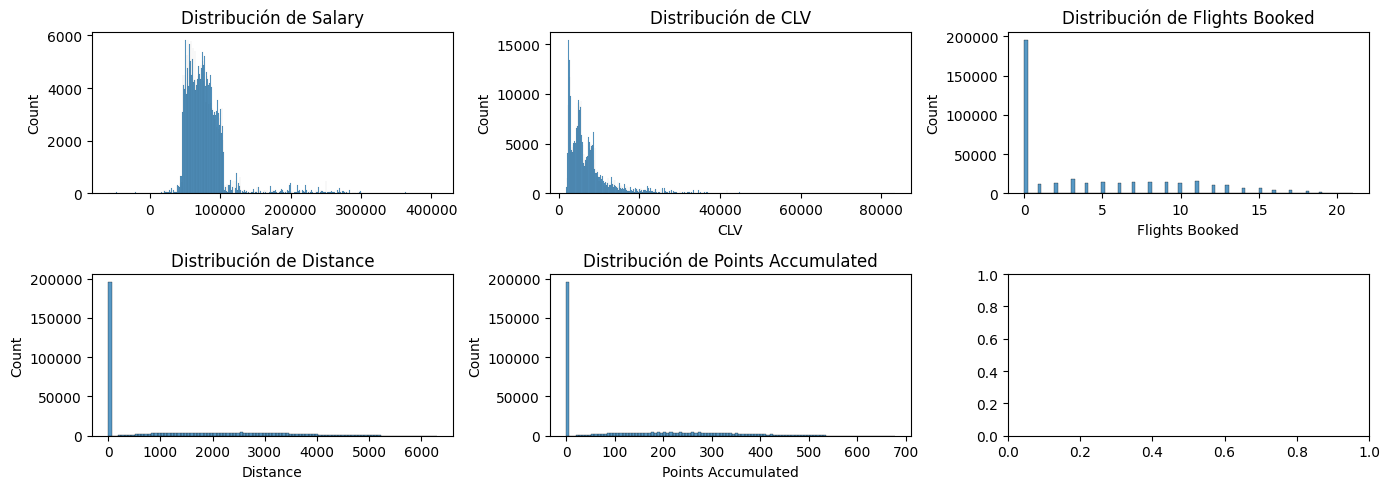

In [7]:
columnas_seleccionadas = ["Salary","CLV","Flights Booked","Distance","Points Accumulated"]
ncols = 3 
nrows= int(np.ceil(len(columnas_seleccionadas) / 3))

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(14,2.5*nrows))

for ax, col in zip(axes.flat, columnas_seleccionadas):
    ax.set_title(f"Distribución de {col}")
    sns.histplot(data=alas_mundo_df, x=col, ax=ax)

plt.tight_layout()
plt.show()

De las gráficas de distribución se extrae que:
- El salario tiene una distribución semejante a una normal, con sesgo principalmente hacia la derecha. Se observan también bastantes valores negativos en su cola izquiera.
- El CLV presenta una distribucion semejante a una exponencial negativa.
- Los Flights Booked no tienen valores unicos lo suficientemente diversos para representarse de forma óptima mediante un histograma, pero se observa que en su caso, así como el de Distance y Points Accumulated, que la mayoría de los registros tienen valor 0. Es decir, que la mayoría de clientes no realizará ningún tipo de viaje en casi todos los meses.

## Ejercicio 2:
Determina si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

 Pasos a seguir:

   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones
   


### Formulación de hipótesis

La hipótesis a contrastar es la siguiente:

> **Hipótesis Alternativa (H₁):** Existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

Para ello, se plantea una hipótesis nula, la cual representa el escenario contrario, y se utilizará un test de contraste de hipótesis para evaluar ambas.

**Hipótesis Nula (H₀):** No existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.

**Hipótesis Alternativa (H₁):** Existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos.


### Transformación necesaria

Para medir el número de vuelos reservados por cliente es necesario agregar los datos del número de vuelos por cada uno de ellos. Previamente, es necesario asimismo comprobar que los clientes que se introducen en la comprobación tienen:
- Datos para el mismo número de años.
- Representación suficiente y equilibrada entre los estratos a comprobar.

#### Número de años

Como se puede observar en el conteo de número de registros, la mayoría de clientes tienen datos para 2 años, 24 meses. 

In [8]:
alas_mundo_df.groupby("Loyalty Number")["Month"].count().value_counts().reset_index()

,Month,count
0,24,16602
1,45,19
2,47,14
3,46,14
4,43,11
5,44,10
6,31,7
7,27,6
8,30,5
9,34,5


No existen clientes con menos de 24 registros y el rango de 24 meses coincide con lo previsto a partir de la exploración inicial. Por lo tanto, el hecho de que existan clientes con datos de más de 24 meses es extraño teniendo en cuenta que se han eliminado duplicados, lo que puede apuntar a doble registro de datos para ciertos meses. 

In [9]:
clientes_sobrerregistrados = (alas_mundo_df.groupby("Loyalty Number")["Month"]
                            .count()[alas_mundo_df.groupby("Loyalty Number")["Month"].count() != 24].index.to_list())
alas_mundo_df[alas_mundo_df["Loyalty Number"].isin(clientes_sobrerregistrados)].head(10)

,Loyalty Number,Province,City,Gender,Education,Salary,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Year,Month,Flights Booked,Distance,Points Accumulated
120,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,1,0,0,0.0
122,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,2,0,0,0.0
123,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,3,5,545,54.0
124,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,3,3,3234,323.0
125,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,4,5,1965,196.0
126,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,4,4,2664,266.0
127,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,2,4,2926,292.0
128,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2018,9,8,2730,273.0
129,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,5,11,2530,253.0
130,193662,Yukon,Whitehorse,Male,Bachelor,51124.0,Star,3844.57,Standard,2012,5,2017,5,9,2988,298.0


A juzgar por los datos de los clientes que están sobrerregistrados, parece que en efecto tienen datos diferentes para un mismo mes, apuntando a un error de registro. La decisión que se va a tomar es la de tener en cuenta que en estos casos, todas las filas "duplicadas" para un mismo mes serían en realidad una con el sumatorio de la individuales. En consecuencia, el tratamiento que se va a seguir es el mismo que se hubiera seguido para cualquier otro cliente, con la salvedad de que es necesario tener en cuenta que la solución adoptada en caso de obtener resultados no esperados.

Agrupando los datos por cliente:

In [10]:
alas_mundo_contraste = alas_mundo_df.groupby(["Loyalty Number","Gender","Education"])[["Salary","Flights Booked"]].sum().reset_index().set_index("Loyalty Number")

Una vez transformados los datos, se puede continuar con los supuestos previos.


### Supuestos Previos

Antes de proceder con el análisis de hipótesis, es necesario verificar que se cumplen tres supuestos estadísticos fundamentales para poder aplicar métodos paramétricos:

1. **Independencia de las Observaciones**: Se asume que las observaciones son independientes entre sí como parte del diseño experimental, salvo que los resultados de los análisis aquí llevados a cabo sugieran lo contrario.
   
2. **Normalidad**: Las distribuciones de los grupos a comparar deben aproximarse a una distribución normal. Este supuesto será evaluado en los pasos siguientes.
   
3. **Homocedasticidad**: Las varianzas de las muestras deben ser homogéneas, lo cual también se verificará a continuación.

Comprobados estos supuestos, se procederá a realizar el contraste de hipótesis mediante métodos paramétricos. En caso de no cumplirse, será necesario recurrir a métodos no paramétricos. Antes de comprobarlos, será conveniente inspeccionar visualmente la distribución del numero de vuelos por cliente según cada grupo:


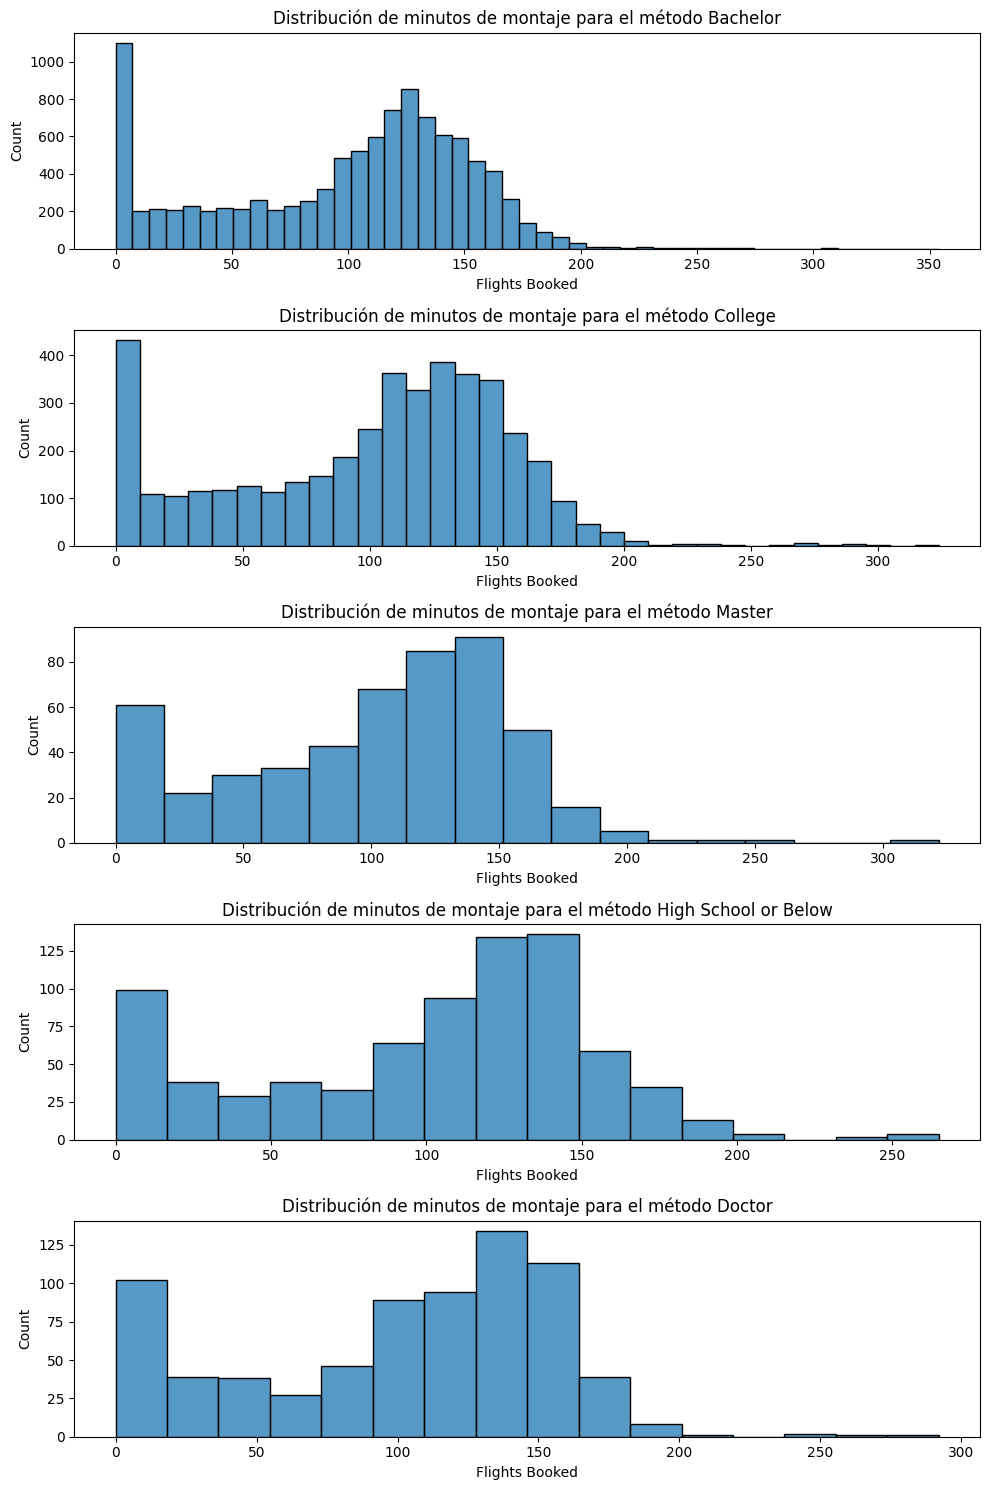

In [11]:
dvs.graficar_distribuciones(alas_mundo_contraste, "Education", "Flights Booked")

Las distribuciones poseen formas semejantes, aunque en principio no se corresponden con la forma teórica de una distribución normal, lo que invita a sospechar que será necesario aplicar métodos no paramétricos para el contraste de hipótesis. Por otro lado, un problema importante que se extrae de los histogramas es que las muestras no poseen los mismos tamaños muestrales en todos los grupos, por lo que es necesario comprobarlos y realizar un remuestreo en caso de confirmarse que no son tamaños equivalentes.

In [12]:
df_equilibrado = sts.evaluar_tamanio_muestras(alas_mundo_contraste, "Education", "Flights Booked")

El reparto de tamaños muestrales por grupo del conjunto es el siguiente:


,Flights Booked
Education,
Bachelor,10475
College,4238
Doctor,734
High School or Below,782
Master,508




Las muestras no son del mismo tamaño, es necesario aplicar remuestreo para igualarlas.
Devolviendo grupos con remuestreo para equilibrar al tamaño muestral mínimo de 508.


························································································
El nuevo conjunto de datos con remuestreo por grupos es el siguiente:


,Flights Booked
Education,
Bachelor,508
College,508
Doctor,508
High School or Below,508
Master,508


El remuestreo ha dado lugar a tamaños muestrales de 508 réplicas, por lo que se considera que se cuenta con muestra suficiente en todos los grupos para obtener significación estadística en los tests a realizar.

Graficando de nuevo los histogramas:

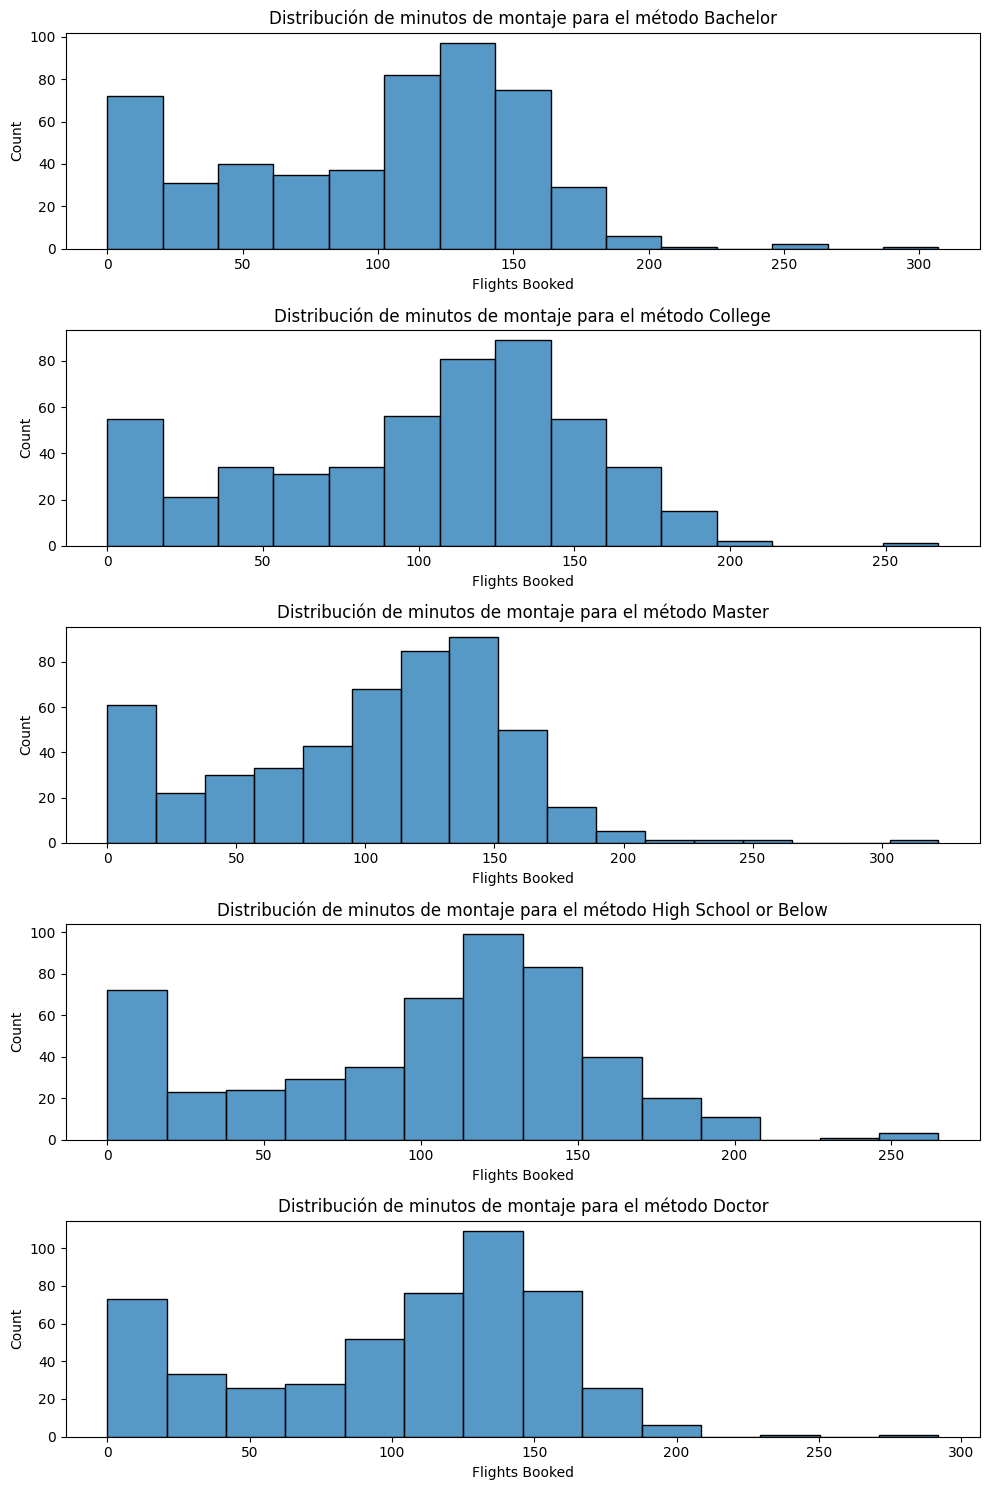

In [13]:
dvs.graficar_distribuciones(df_equilibrado, "Education", "Flights Booked")

Con los tamaños muestrales igualados y comprobados visualmente, se puede proceder a la comprobación del supuesto de normalidad.

### Formulación de hipótesis para el Test de Normalidad de Shapiro-Wilk

La hipótesis a contrastar en el Test de Shapiro-Wilk es la siguiente:

> **Hipótesis Alternativa (H₁):** La distribución de los datos no es normal.

Para evaluar la normalidad de la muestra, se plantea una hipótesis nula que representa el supuesto de normalidad. Utilizaremos el Test de Shapiro-Wilk para contrastar ambas.

**Hipótesis Nula (H₀):** Los datos siguen una distribución normal.

**Hipótesis Alternativa (H₁):** Los datos no siguen una distribución normal.


In [14]:
sts.tests_normalidad(df_equilibrado, columna_grupo="Education", columna_metrica="Flights Booked")

Resultados del test de bondad de ajuste Shapiro-Wilk:
El p-valor para el grupo 'Bachelor' es 0.0
El p-valor para el grupo 'College' es 0.0
El p-valor para el grupo 'Master' es 0.0
El p-valor para el grupo 'High School or Below' es 0.0
El p-valor para el grupo 'Doctor' es 0.0


Resultados del test de bondad de ajuste Kolmogorov-Smirnoff:
El p-valor para el grupo 'Bachelor' es 0.0
El p-valor para el grupo 'College' es 0.0
El p-valor para el grupo 'Master' es 0.0
El p-valor para el grupo 'High School or Below' es 0.0
El p-valor para el grupo 'Doctor' es 0.0


Tomando un alto nivel de significación de 0.01, se puede afirmar que existen evidencias signifivas que permiten rechazar la hipótesis nula a favor de la hipótesis alternativa, concluyendo por lo tanto que los datos no siguen una distribución normal. Es necesario por tanto recurrir a métodos no paramétricos.

### Formulación de hipótesis para contrastes no paramétricos de diferencia de medianas

La hipótesis a contrastar en un contraste de hipótesis para diferencia de medias en pruebas no paramétricas es la siguiente:

> **Hipótesis Alternativa (H₁):** Existe una diferencia significativa entre las medias de los grupos comparados.

Para evaluar si existe diferencia en las medianas (dado que se trata de pruebas no paramétricas), se plantea una hipótesis nula que asume la igualdad de las distribuciones de los grupos en comparación, lo cual se traduciría en medianas similares.

**Hipótesis Nula (H₀):** No existe una diferencia significativa entre las medianas de los grupos comparados.

**Hipótesis Alternativa (H₁):** Existe una diferencia significativa entre las medianas de los grupos comparados.

### Consideraciones

Este tipo de prueba es adecuado cuando no se cumplen los supuestos de normalidad en las distribuciones, por lo que en lugar de comparar medias (como en pruebas paramétricas), se evalúan las medianas o rangos de los grupos. 


Aplicando la funcion de `test_no_parametrico()` que evalúa y aplica automáticamente el test no paramétrico necesario:

In [15]:
sts.test_no_parametrico(df_equilibrado, "Education","Flights Booked")

KruskalResult(statistic=np.float64(1.0109292858347272), pvalue=np.float64(0.9081342494167839))

Dado que el p-valor (p-valor = 0.90) es mayor que el nivel de significación (α = 0.05), no se encuentran evidencias estadísticas significativas para rechazar la hipótesis nula. Esto indica que no se puede afirmar que existan diferencias significativas entre alguna de las medianas de los grupos comparados.

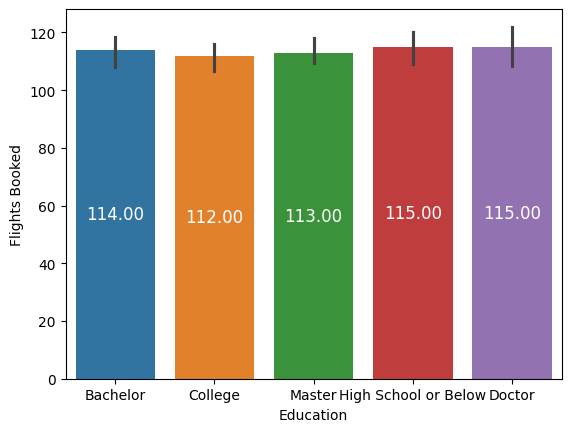

In [16]:
ax = sns.barplot(data=df_equilibrado, x="Education", y="Flights Booked", estimator="median", hue="Education")
dvs.plot_bar_labels(ax)

## Ejercicio 3:
Determina si existe una diferencia significativa en el salario de los clientes en función del género de los mismos.

Pasos a seguir:
   - Definición de la hipótesis.
   - Prueba de hipótesis
   - Análisis de resultados
   - Conclusiones

Partiendo de la transformación de datos realizada para la comparación de distribuciones anterior, se comienza por estudiar si esta nueva distribución cumple los supuestos para aplicar tests de contraste paramétrico.

1. **Independencia de las Observaciones**: Se asume que las observaciones son independientes entre sí como parte del diseño experimental, salvo que los resultados de los análisis aquí llevados a cabo sugieran lo contrario.
   
2. **Normalidad**: Las distribuciones de los grupos a comparar deben aproximarse a una distribución normal. Este supuesto será evaluado en los pasos siguientes.
   
3. **Homocedasticidad**: Las varianzas de las muestras deben ser homogéneas, lo cual también se verificará a continuación.

Comprobados estos supuestos, se procederá a realizar el contraste de hipótesis mediante métodos paramétricos.


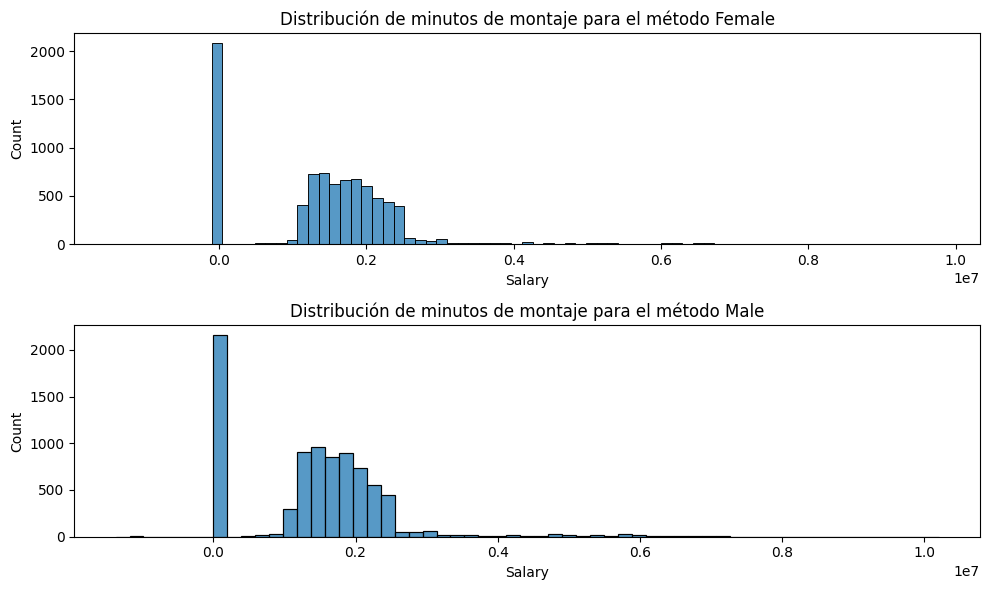

In [17]:
dvs.graficar_distribuciones(alas_mundo_contraste, "Gender", "Salary")

Las distribuciones poseen formas semejantes, aunque en principio no se corresponden con la forma teórica de una distribución normal, lo que invita a sospechar de nuevo que será necesario aplicar métodos no paramétricos para el contraste de hipótesis. En este caso, parece que los tamaños muestrales sí que son equivalentes.

In [18]:
df_equilibrado_salario = sts.evaluar_tamanio_muestras(alas_mundo_contraste, "Gender", "Salary")

El reparto de tamaños muestrales por grupo del conjunto es el siguiente:


,Salary
Gender,
Female,8410
Male,8327




Las muestras no son del mismo tamaño, es necesario aplicar remuestreo para igualarlas.
Devolviendo grupos con remuestreo para equilibrar al tamaño muestral mínimo de 8327.


························································································
El nuevo conjunto de datos con remuestreo por grupos es el siguiente:


,Salary
Gender,
Female,8327
Male,8327


Había una ligera diferencia, que comparada con el tamaño muestral podría no haber sido significativa. En cualquier caso, se continúa con el conjunto de muestras equilibradas. Se puede proceder ahora a la comprobación del supuesto de normalidad.

### Formulación de hipótesis para el Test de Normalidad de Shapiro-Wilk

La hipótesis a contrastar en el Test de Shapiro-Wilk es la siguiente:

> **Hipótesis Alternativa (H₁):** La distribución de los datos no es normal.

Para evaluar la normalidad de la muestra, se plantea una hipótesis nula que representa el supuesto de normalidad. Utilizaremos el Test de Shapiro-Wilk para contrastar ambas.

**Hipótesis Nula (H₀):** Los datos siguen una distribución normal.

**Hipótesis Alternativa (H₁):** Los datos no siguen una distribución normal.


In [19]:
sts.tests_normalidad(df_equilibrado_salario, columna_grupo="Gender", columna_metrica="Salary")

Resultados del test de bondad de ajuste Shapiro-Wilk:
El p-valor para el grupo 'Female' es 0.0
El p-valor para el grupo 'Male' es 0.0


Resultados del test de bondad de ajuste Kolmogorov-Smirnoff:
El p-valor para el grupo 'Female' es 0.0
El p-valor para el grupo 'Male' es 0.0


Tomando un alto nivel de significación de 0.01, se puede afirmar que existen evidencias signifivas que permiten rechazar la hipótesis nula a favor de la hipótesis alternativa, concluyendo por lo tanto que los datos no siguen una distribución normal. Es necesario por tanto recurrir a métodos no paramétricos.

### Formulación de hipótesis para contrastes no paramétricos de diferencia de medianas

La hipótesis a contrastar en un contraste de hipótesis para diferencia de medias en pruebas no paramétricas es la siguiente:

> **Hipótesis Alternativa (H₁):** Existe una diferencia significativa entre las medias de los grupos comparados.

Para evaluar si existe diferencia en las medianas (dado que se trata de pruebas no paramétricas), se plantea una hipótesis nula que asume la igualdad de las distribuciones de los grupos en comparación, lo cual se traduciría en medianas similares.

**Hipótesis Nula (H₀):** No existe una diferencia significativa entre las medianas de los grupos comparados.

**Hipótesis Alternativa (H₁):** Existe una diferencia significativa entre las medianas de los grupos comparados.

### Consideraciones

Este tipo de prueba es adecuado cuando no se cumplen los supuestos de normalidad en las distribuciones, por lo que en lugar de comparar medias (como en pruebas paramétricas), se evalúan las medianas o rangos de los grupos. 


Aplicando la funcion de `test_no_parametrico()` que evalúa y aplica automáticamente el test no paramétrico necesario:

In [20]:
sts.test_no_parametrico(df_equilibrado_salario, columna_grupo="Gender", columna_metrica="Salary")

MannwhitneyuResult(statistic=np.float64(35137265.5), pvalue=np.float64(0.12841749654895115))

Dado que el p-valor (p-valor = 0.128) es mayor que el nivel de significación (α = 0.05), no se encuentran evidencias estadísticas significativas para rechazar la hipótesis nula. Esto indica que no se puede afirmar que existan diferencias significativas entre alguna de las medianas de los grupos comparados.

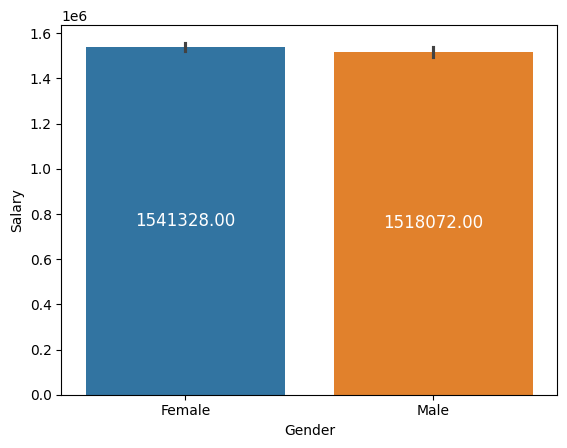

In [21]:
ax = sns.barplot(data=df_equilibrado_salario, x="Gender", y="Salary", estimator="median", hue="Gender")
dvs.plot_bar_labels(ax)